In [278]:
### Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PCA**

Principal Component Analysis (PCA) is a technique used to reduce the number of features (or variables) in a dataset while keeping as much important information (variance) as possible.

For example, instead of having 10 features, PCA might reduce it to 2 or 3 features that capture most of the variation/ information in the data

**How do you do a Principal Component Analysis**

Step1: Standardize the range of continuous initial variables.

Step2: Compute the covariance matrix to identify correlation.

Step3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify principal components.

Step4: Sort the eigen values in descending order to pick the highest one.

Step5: Recast the data along the principal component axes.

In [279]:
###Let's Upload and read the dataset
## here we are going to uplad the dataset from sklearn online datasest
from sklearn import datasets
from sklearn.datasets import load_digits


In [280]:
df = load_digits()
df


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Note :- Here the datasets is in unorganised way

In [281]:
##Let access thr keys of dataset
df.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [282]:
## make a proper dataset we will only use important things from load_digits
df = pd.DataFrame(df.data, columns=df.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [283]:
## create a traget column to know which image will be formed after combining all 64 columns data
df["Target"] = dataset.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [284]:
## check the shape of the data
df.shape

(1797, 65)

<Figure size 640x480 with 0 Axes>

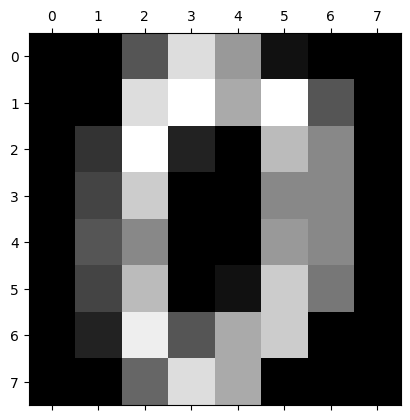

In [285]:
###  form an image by using the data of first rows
plt.gray()
plt.matshow(df.iloc[0][:-1].values.reshape(8,8))
plt.show()

<Figure size 640x480 with 0 Axes>

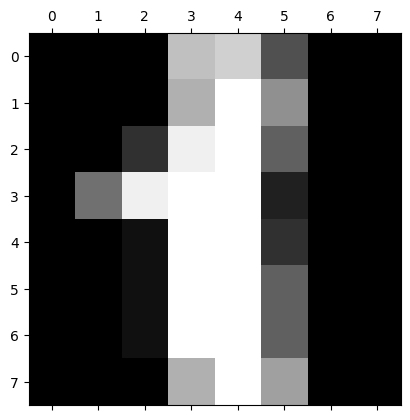

In [286]:
###  form an image by using the data of first rows
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))
plt.show()

<Figure size 640x480 with 0 Axes>

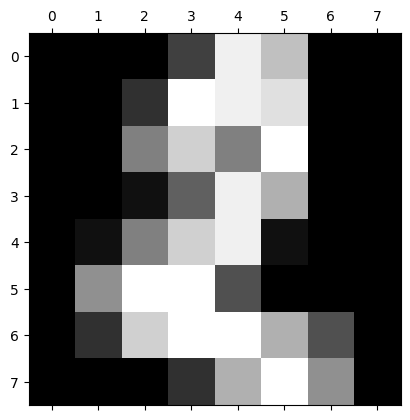

In [287]:
###  form an image by using the data of 2 rows
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.data[2].reshape(8,8))
plt.show()

In [288]:
df["Target"].unique() # so total wecare havong image of number 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [289]:
 ### Let's  che here the data is inbalanced or not
 df["Target"].value_counts()

,count
Target,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


**NOTE:- **
Here the data is not inbalanced

In [290]:
## let's split the data so we can apply PCA to reduce the no of features
x = df.drop(columns=["Target"], axis=1)
y = df["Target"]



In [291]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [292]:
y

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


**Principal Component Analysis**

In [293]:
#Step1: Standardize the range of continuous initial variables.
from sklearn.preprocessing import StandardScaler

In [294]:
## class
se = StandardScaler()

In [295]:
## x_scalled is the new standardize data
x_scaled = se.fit_transform(x)

In [296]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [297]:
## framed the x_scaled values
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [298]:
#Step2: Compute the covariance matrix to identify correlation.

Inorder to find the relation between features and gain
imp info we need to find covariance matrix

**Covariance Matrix:**

Imagine you have a dataset with two features: height and weight. The covariance matrix will tell you how height varies with height (which is its own variance), how weight varies with weight, and how height and weight vary with each other.

In short:

The covariance matrix helps PCA understand how your data's features are related so it can reduce dimensions while keeping the most important information.

Formula:

      **sigma = 1/n-1(Xt X)** the t is in power

      where:

      x is the data matrix, where each represents a data point and each column represent a variable

      xt is the transpose of matrix X
      
      Sigma is the covariance matrix

      n is the number of data points (rows in the data matrix)

In [299]:
## calculating the covariance matrix
cov_mat = np.cov(x_scaled.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [300]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


It is a symmetrix matrix that shows covariance of each pair of variables.


Eigenvectors (The Directions):

Eigenvectors are the new directions along which the data is spread out the most.

Imagine you have a cloud of data points. Eigenvectors tell you the most important directions to look at where the data has the most variation.

In PCA, they represent the principal components—the new axes along which we’ll project the data.



Eigenvalues (The Importance):

Eigenvalues tell us how much information (or variance) is captured along each eigenvector (principal component).

A larger eigenvalue means that the corresponding eigenvector (direction) captures more important information.

In PCA, the eigenvalues help us rank the eigenvectors by importance—so we know which ones to keep.

**Simple Analogy:**

Imagine you are looking at a 3D object, like a pencil, and want to project its shadow on a 2D surface (like a piece of paper).


Eigenvectors tell you the best angles to look at the pencil so that you capture the most important details of its shape.


Eigenvalues tell you how much of the pencil’s "shape" is captured when you look at it from each angle.


In [301]:
##Step3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify principal components.
eig_vals , eig_vecs = np.linalg.eig(cov_mat)

In [302]:
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [303]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [304]:
pd.DataFrame(eig_vals)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


In [305]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182234,-0.047027,0.023588,-0.178153,-0.029978,0.231723,-0.108310,0.125524,0.213820,0.059834,...,0.039356,-0.036629,0.082404,0.052290,0.197267,0.024853,0.052605,0.0,0.0,0.0
2,0.285868,-0.059565,-0.056799,-0.156129,-0.014666,0.119875,-0.004755,0.006178,0.120140,0.007681,...,-0.080164,0.176636,0.091203,-0.001822,-0.129372,-0.069592,-0.090823,0.0,0.0,0.0
3,0.220370,0.020804,-0.040464,-0.167800,0.043716,-0.100392,0.233717,-0.033408,-0.101895,-0.021639,...,0.125306,-0.224852,-0.089657,0.040788,-0.148353,0.052446,-0.323498,0.0,0.0,0.0
4,-0.025170,-0.155903,-0.067065,0.000009,-0.139993,-0.093471,-0.039540,0.046161,-0.093102,0.005066,...,0.049967,-0.024456,0.039529,0.012110,-0.072823,-0.057241,0.048470,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.194449,0.009905,-0.083464,-0.171490,0.100375,-0.086503,0.135319,-0.098852,-0.115978,-0.105825,...,-0.067003,0.101720,-0.245611,-0.069682,0.336075,0.080163,0.138750,0.0,0.0,0.0
60,0.017774,0.251934,-0.062455,0.154438,-0.003774,0.111832,-0.172848,-0.055067,-0.154210,-0.100353,...,-0.116854,0.219353,0.196726,0.048100,-0.189613,-0.081401,-0.036926,0.0,0.0,0.0
61,0.103198,0.242618,-0.022280,0.252432,0.094738,0.057756,-0.032155,0.034265,-0.027141,-0.036675,...,0.193102,-0.023445,0.152260,-0.131265,-0.019375,-0.033929,-0.168659,0.0,0.0,0.0
62,0.119811,0.165089,0.100366,0.160720,0.244026,0.028957,0.077612,-0.164484,0.144245,0.057176,...,0.067240,0.095552,-0.207269,0.284186,0.086148,-0.141619,0.094642,0.0,0.0,0.0


**Explained variance**

Explained Variance tells us how much information (or variance) each principal component (new direction in the data) captures. The more variance a principal component explains, the more important it is.

How is it calculated?

Each principal component has a number called an eigenvalue, which tells us how much information it holds.

To find out how much of the total information this component explains, we divide its eigenvalue by the sum of all eigenvalues.

In [306]:
## find the total sum
tot = sum(eig_vals)
tot

np.float64(61.033964365256246)

In [307]:
Exp_var = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
Exp_var

[np.float64(12.0339160977349),
 np.float64(9.561054403097925),
 np.float64(8.444414892624541),
 np.float64(6.498407907524162),
 np.float64(4.860154875966386),
 np.float64(4.214119869271926),
 np.float64(3.942082803567374),
 np.float64(3.389380924638331),
 np.float64(2.998221011625225),
 np.float64(2.9320025512522148),
 np.float64(2.781805463550305),
 np.float64(2.577055092581998),
 np.float64(2.275303315764246),
 np.float64(2.2271797395143564),
 np.float64(2.165229431849247),
 np.float64(1.9141666064421292),
 np.float64(1.7755470851682091),
 np.float64(1.6380692742844192),
 np.float64(1.5964601688623465),
 np.float64(1.4891911870878212),
 np.float64(1.3479695658179427),
 np.float64(1.27193137023478),
 np.float64(1.1658373505919553),
 np.float64(1.057646598536325),
 np.float64(0.9753159471981092),
 np.float64(0.9445589897320044),
 np.float64(0.8630138269707233),
 np.float64(0.836642853668514),
 np.float64(0.7976932484112421),
 np.float64(0.7464713709260657),
 np.float64(0.72558215137027

*Cumulative variance explained - inorder to find the proper pc and* *explained variance, we need to find cum var*




*Why It's Important:*

It helps you decide how many components to keep. If the first few components explain 95% of the variance, you can ignore the rest while still keeping most of the important information.

In [308]:
cum_exp_var = np.cumsum(Exp_var)
cum_exp_var

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

In [309]:
pd.DataFrame(cum_exp_var)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


In [310]:
#plot a graph between individual explained variance and cumulative explained variance
#to check the percentage of different pc's like pc1,pc2,pc3...
#from the graph, neglect the pc's which don't impact our model and select impactful components

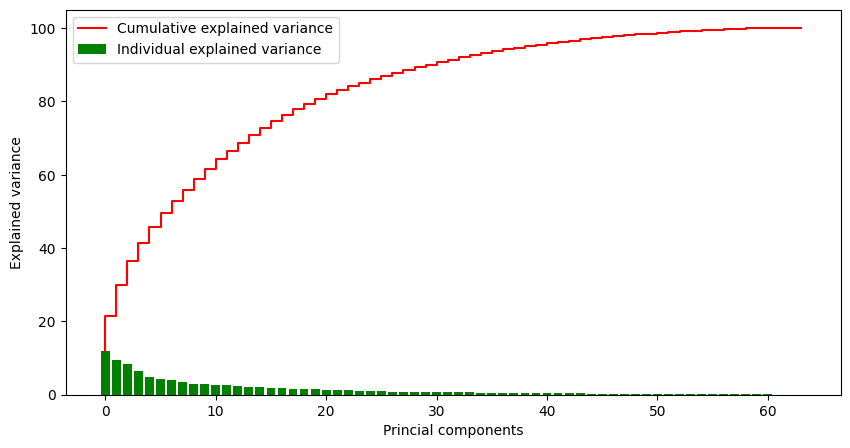

In [311]:
#screeplot ( combination of bar plot and step plot )
plt.figure(figsize=(10,5))
plt.bar(range(len(Exp_var)) , Exp_var, label = "Individual explained variance", color = "g")
plt.step(range(len(cum_exp_var)), cum_exp_var , label = "Cumulative explained variance", color = "r")
plt.xlabel("Princial components")
plt.ylabel("Explained variance")
plt.legend()
plt.show()


In [312]:
#Now our data is prepared for training
#1st step is to split the data
#2nd step is to use your model and pass the data in it
#3rd step is to find the accuracy


**Apply PCA**

In [313]:
from sklearn.decomposition import PCA

In [314]:
pca=PCA(0.95)

In [315]:
x_pca = pca.fit_transform(x) ## select the no of principal components that can
## explain 95 % of data

In [316]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.259466,-21.274883,9.463055,-13.014189,7.128823,7.440659,-3.252837,-2.553470,0.581842,-3.625697,...,3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,0.943669,1.132502
1,7.957611,20.768699,-4.439506,14.893664,-5.896249,6.485622,-2.126228,4.615936,-3.587450,1.074705,...,5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,0.510227,-2.313549
2,6.991923,9.955986,-2.958558,12.288302,18.126023,4.507664,-1.843122,16.415200,-0.719233,-4.255805,...,-8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,-2.157657,-0.837958
3,-15.906105,-3.332464,-9.824372,12.275838,-6.965169,-1.089483,1.042085,-10.973556,3.259735,-6.498753,...,3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,-4.682220,1.113042
4,23.306867,-4.269061,5.675129,13.851524,0.358124,2.857574,0.720497,-13.041696,3.835413,-13.414164,...,-5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,-0.627979,3.287348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-14.606628,-13.344124,13.439048,6.502950,-3.787472,2.729848,4.432327,3.914347,-7.320933,8.449179,...,-1.613182,1.732102,2.198947,0.273557,2.325997,0.547892,-2.445219,4.914990,0.183197,2.788351
1793,6.464574,-20.567299,9.155110,-12.554091,9.015978,13.707147,-3.831286,3.756258,7.192802,5.239837,...,0.317365,-3.994398,-1.577277,-0.578987,1.222268,2.432416,-1.134583,-0.048710,0.304789,3.483718
1794,10.801284,6.960252,-5.599555,7.227733,3.459646,12.375204,4.489790,7.415072,3.961585,13.065095,...,-2.400419,-0.732898,4.330780,0.180299,3.817864,-5.421945,4.431521,-3.568662,-1.824444,-3.538859
1795,-4.872100,-12.423954,10.170866,6.668850,-3.569061,0.003897,2.994734,4.357892,-3.939242,13.145255,...,0.076164,1.871624,-1.486850,3.125878,-3.757649,5.096836,-2.690764,3.253301,-0.954842,0.938956


In [317]:
from sklearn.model_selection import train_test_split

In [318]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [319]:
x_train_pca , x_test_pca  , y_train , y_test = train_test_split(x_pca , y , test_size=0.2 , random_state = 42)

In [320]:
model.fit(x_train_pca , y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [321]:
y_pred = model.predict(x_test_pca)

In [322]:
from sklearn.metrics import*

In [323]:
accuracy_score(y_pred, y_test)

0.9611111111111111

1) PCA is ________?

Semisupervised

Supervised

Unsupervised

None of the above

In [324]:
##Unsupervised

2) Why is PCA needed in the Data Science field?

Data Manipulation

Data Visualization

All of the Above

In Dimensionality Reduction

PCA is primarily used for Dimensionality Reduction. While it can indirectly help with data manipulation and visualization by reducing the number of features, its core purpose is to reduce the number of variables in a dataset while retaining as much important information (variance) as possible.

3) Extract only features and scale the data using StandardScaler() , compute min covariance?

In [325]:
min_covariance = np.min(cov_mat)
min_covariance

np.float64(-0.570513633238107)

4) Extract only features and scale the data using StandardScaler() , how many eigen_values will be calculated?


In [326]:
count_eig_val = x_scaled.shape[1]
count_eig_val

64

5) from the above eigenvalues and eigenvectors, create eigenpair and calculate maximum cumulative explained variance?

In [327]:
# Create eigenpairs
eigenpairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the eigenpairs in descending order based on eigenvalues
eigenpairs.sort(key=lambda k: k[0], reverse=True)

# Calculate cumulative explained variance
total = sum(eig_vals)
cumulative_explained_variance = [(i / total) * 100 for i in sorted(eig_vals, reverse=True)]
maximum_cumulative_explained_variance = np.cumsum(cumulative_explained_variance)[-1]

In [328]:
maximum_cumulative_explained_variance

np.float64(100.00000000000004)

6) Why is cumulative explained variance required before applying PCA?


In [329]:
## the minimum component to be selected

 8.Fit the data to PCA and compute the maximum explained_variance_ratio?

In [330]:
pca.fit(x_scaled)
maximum_explained_variance_ratio = np.max(pca.explained_variance_ratio_)


In [331]:
maximum_explained_variance_ratio

np.float64(0.12033916097734909)

9.Which of the following is the correct syntax for finding the eigenvalues and eigenvectors with give covariance matric (cov_mat)?

In [332]:
#eig_vals , eig_vecs = np.linalg.eig(cov_mat)

10) Choose the correct order of steps to choose principal components: A . compute the covariance matrix. B. choose the principal components from Eigen values and Vectors. C. collecting the data. D. compute Eigen values and vectors. E.  standardization.

A->C->E->D->B

none of the above

C->E->A->D->B

E->D->C->D->B

Ans

The correct order of steps to choose principal components in PCA is:

Collecting the data.
Standardization.
Compute the covariance matrix.
Compute Eigen values and vectors.
Choose the principal components from Eigen values and Vectors.
Based on the options provided, the correct order is C->E->A->D->B.

11)
What correction is required in the following lines of code to create covariance matrix?
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
covariance_matrix = np.cov(standardized_data)
Need to perform transpose of standardized_data
Need to find eigen values and eigen Vectors before standardization.
All of the above.
Need to flatten the standardized_data.

Ans

To correctly compute the covariance matrix using np.cov with your standardized data, you need to perform the transpose of the standardized data. The np.cov function expects variables as rows and observations as columns.

12)
What exactly do you understand by the given code?
pca = PCA(n_components=0.95)
We are looking for the components that accumulated to the total of 95% of the mean in the data.
We are looking for the components that explains 95% of the standard deviation in the data.
The components should have 0.95 probability in the dataset.
We are looking for the principal components that cumulatively explain 95% of the variance in the data.

Ans

The code pca = PCA(n_components=0.95) means that We are looking for the principal components that cumulatively explain 95% of the variance in the data.

13)
How is the first principal component determined in PCA?
It is the component with the median variance.
It is the component with the most variance.
It is randomly selected.
It is the component with the least variance.


Ans

The first principal component in PCA is determined as It is the component with the most variance. It's the direction in your data along which the data points show the greatest spread.



14) Which of the following non-zero vector stays parallel after matrix multiplication
EigenValue
Covariance vector
EigenVector
Explained variance ratio




Ans

the non-zero vector that stays parallel after matrix multiplication is the EigenVector. When a matrix multiplies an eigenvector, the resulting vector is a scalar multiple of the original eigenvector, meaning it lies on the same line through the origin.




15) The Output of PCA is always a new representation of data with a lower dimension than the original data representation.
FALSE
TRUE




Ans

The statement "The Output of PCA is always a new representation of data with a lower dimension than the original data representation" is FALSE.

While the main goal of PCA is dimensionality reduction, if you choose to keep all the principal components, the resulting data will have the same number of dimensions as the original data.

16) What is the difference between PCA and Linear Regression?

Horizontal distance calculated in PCA, Manhattan distance calculated in Linear Regression.

Manhattan distance calculated in PCA, Horizontal distance calculated in Linear Regression

Euclidean distance calculated in PCA, Vertical distance calculated in Linear Regression.

Vertical distance calculated in PCA, Euclidean distance calculated in Linear Regression






Ans

Euclidean distance calculated in PCA, Vertical distance calculated in Linear Regression.


Linear Regression minimizes the vertical distance (the difference between the actual and predicted values, also known as residuals). PCA minimizes the perpendicular distance (Euclidean distance) from the data points to the principal components.





17) How to Determine the number of principal components to retain in PCA?

Cumulative variance plot

Elbow plot

None of the above

Residual Plot

In [333]:
##Cumulative variance plot

18) What is the minimum and maximum limit of n_components value we can give in PCA?

Minimum 2, Maximum 100% of independent columns count

Minimum 90% of independent columns count, Maximum 100% of independent columns count

Minimum 1, Maximum 95% of independent columns count

Minimum 95% of independent columns count, Maximum 95% of independent columns count

In [334]:
##Minimum: 1, Maximum: 100% of independent columns count

In [335]:
### upload and read the new dataset
df1 = pd.read_csv("/content/GYM.csv")

In [336]:
df1

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...
62179,23,5,1,0,61.07,0,1,3,18
62180,21,5,1,0,61.07,0,1,3,18
62181,25,5,1,0,56.71,0,1,3,19
62182,18,5,1,0,56.71,0,1,3,19


19) Use the Gym.csv dataset and Apply PCA in the given dataset, what is the minimum n_components required to attain 0.99% of variance?

In [337]:
# Separate features (X) and target (if applicable, though not needed for PCA)
# Assuming all columns except 'number_people' are features for PCA, adjust if necessary
X_gym = df1.drop(columns=['number_people'])

# Standardize the data
scaler_gym = StandardScaler()
X_gym_scaled = scaler_gym.fit_transform(X_gym)

# Apply PCA with n_components=0.99
pca_gym = PCA(n_components=0.99)
X_gym_pca = pca_gym.fit_transform(X_gym_scaled)

# Get the number of components required
n_components_gym = pca_gym.n_components_

print(f"The minimum number of components required to attain 99% of variance is: {n_components_gym}")

The minimum number of components required to attain 99% of variance is: 8


20) Apply PCA in the given dataset(gym.csv) with n_components as 2, Then get the original (approx.) data back from PCA, what is the difference in sum of variance of all columns before and after applying PCA?

83.74

94.15

5.85

16.26

In [342]:
# Apply PCA with n_components=2
pca_gym_2 = PCA(n_components=2)
X_gym_pca_2 = pca_gym_2.fit_transform(X_gym_scaled)

# Inverse transform the data back to the original feature space (approximate)
X_gym_reconstructed = pca_gym_2.inverse_transform(X_gym_pca_2)

# Calculate the sum of variance of the original scaled data
original_variance_sum = np.sum(np.var(X_gym_scaled, axis=0))

# Calculate the sum of variance of the reconstructed data
reconstructed_variance_sum = np.sum(np.var(X_gym_reconstructed, axis=0))

# Calculate the difference in the sum of variance
variance_difference = original_variance_sum - reconstructed_variance_sum

print(f"Sum of variance of original scaled data: {original_variance_sum}")
print(f"Sum of variance of reconstructed data: {reconstructed_variance_sum}")
print(f"Difference in sum of variance: {variance_difference}")

Sum of variance of original scaled data: 8.0
Sum of variance of reconstructed data: 3.1912029630387746
Difference in sum of variance: 4.808797036961225


22) What is the sum of eigenvalues calculated for the first 8 records(gym.csv) with the independent features?


In [344]:
# Sum of the first 8 eigenvalues
sum_of_first_8_eig_vals = np.sum(eig_vals[:8])

print(f"The sum of the first 8 eigenvalues is: {sum_of_first_8_eig_vals}")

The sum of the first 8 eigenvalues is: 32.313536316911005


23) Compare the performance of two Linear Regression models(gym.csv):
The first model uses the raw data without any preprocessing.
The second model applies PCA with n_components set to 4 before fitting the data.
Both models should be generated using train_test_split with test_size=0.2 and random_state=24 during the train-test split. Your task is to calculate the Root Mean Squared Error (RMSE) for both models and determine whether the performance of the second model (PCA-based) is better compared to the first model (raw data).

Model 2 performance is better than Model 1

No change in performance

Model 2 performance is not better than Model 1

24) Compute min correlation in the given dataset?
-0.0592
-0.0822
-0.1841
-0.1739

In [346]:
# Calculate the correlation matrix for the 'GYM.csv' dataset
correlation_matrix_gym = df1.corr()

# Exclude the diagonal (correlation of a feature with itself)
np.fill_diagonal(correlation_matrix_gym.values, np.nan)

# Find the minimum correlation value
min_correlation_gym = np.nanmin(correlation_matrix_gym)

print(f"The minimum correlation in the dataset is: {min_correlation_gym}")

The minimum correlation in the dataset is: -0.1739578122762517


21) Is it appropriate to use PCA as a method for preventing overfitting in machine learning models?

FALSE

TRUE

In [340]:
##TRUE